In [1]:
import os
import pandas as pd
!pip install sudachipy

In [2]:
!pip install https://object-storage.tyo2.conoha.io/v1/nc_2520839e1f9641b08211a5c85243124a/sudachi/SudachiDict_core-20191030.tar.gz

  Using cached https://object-storage.tyo2.conoha.io/v1/nc_2520839e1f9641b08211a5c85243124a/sudachi/SudachiDict_core-20191030.tar.gz
  Created wheel for SudachiDict-core: filename=SudachiDict_core-20191030-cp36-none-any.whl size=70878879 sha256=1347a8e8a121c914fbedc290dccc6f24d376ead73c3de6de03ee4e7f3db54591
  Stored in directory: /root/.cache/pip/wheels/89/ef/df/2d5ee9dfb78a796e7f03965b4a9b31e1b7007b6a47c12d29ad
Successfully built SudachiDict-core


In [3]:
from sudachipy import dictionary
from sudachipy import tokenizer

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [5]:
def TokenCleanText(tker, mode, text):
  text = text.strip()
  tokenized_txt = [m.dictionary_form() for m in tker.tokenize(text, mode)]
  cleaned_txt = [word for word in tokenized_txt if word not in sw]
  return cleaned_txt

In [6]:
full_text = pd.read_csv(os.getcwd()+'/Task_3/yahoo_jp.csv',sep=";")['text'].values

In [7]:
with open (os.getcwd() + '/Task_3/stopwords-ja.txt') as sw_file:
  sw = sw_file.read().splitlines()
sw.extend(['\n','\n\n'])

In [8]:
#tokenize text
tk_obj = dictionary.Dictionary().create()
mode = tokenizer.Tokenizer.SplitMode.C
full_text_clean = [TokenCleanText(tk_obj, mode, text) for text in full_text]
clean_words = [word for txt in full_text_clean for word in txt]

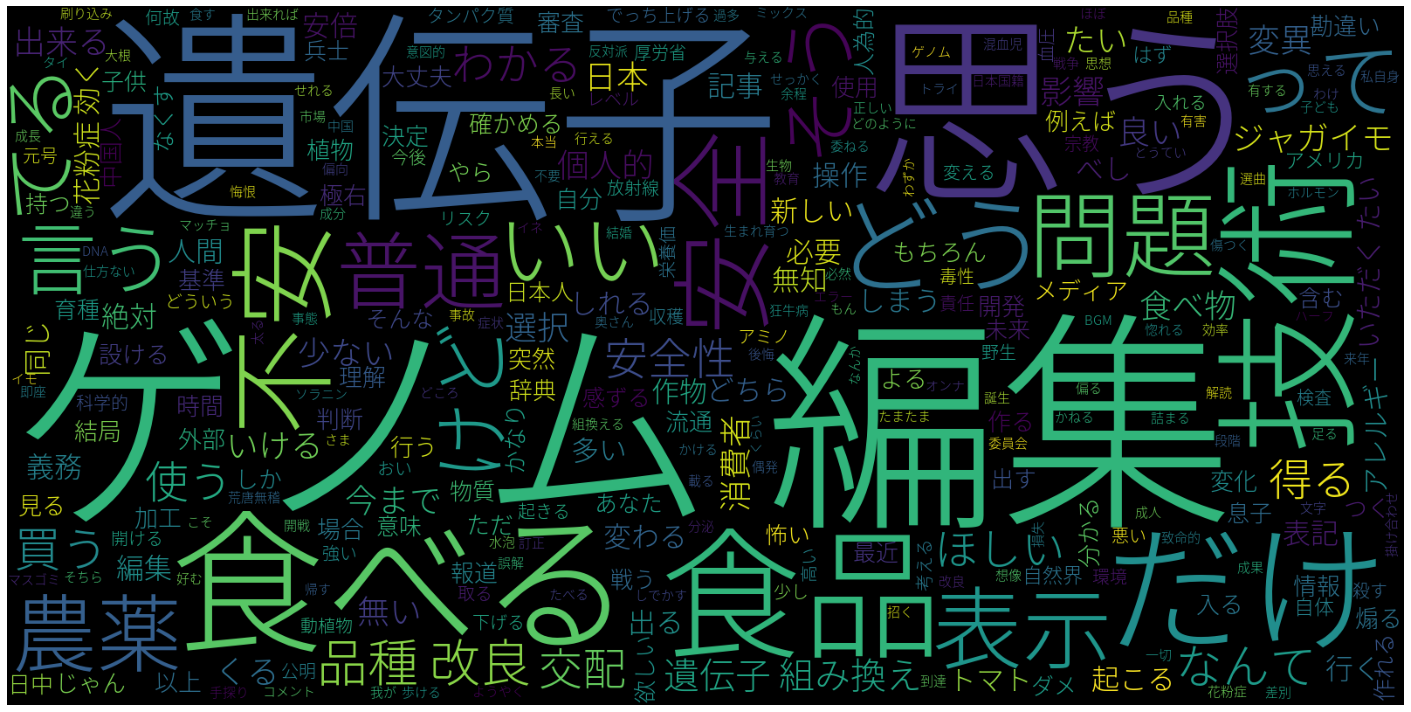

<Figure size 432x288 with 0 Axes>

In [9]:
#create wordcloud
stopwords = set(STOPWORDS)
font_path = os.getcwd() + "/Task_3/NotoSansCJKjp.otf"
plt.figure(figsize=(20,10))
wordcloud = WordCloud(max_words=300, font_path = font_path,
                      stopwords=stopwords, width=1600,
                      height = 800).generate(" ".join(clean_words))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout()
plt.show()
plt.savefig(os.getcwd() + "/Task_3/wordcloud_jp.png", dpi=300)